# **GENETIC ALGORITHM FROM SCRATCH**

## **1. Import Library**

Pengolahan Data

In [1]:
import numpy as np
import pandas as pd
import copy
import random

Visualisasi Data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Penampilan Hasil Data

In [3]:
import warnings

### Algoritma Genetika

* Teori ini menjadi cikal bakal evolutionary computation untuk menyelesaikan masalah optimisasi, pemilihan fitur, knapsack problem klasik, dan banyak lagi. knapsack problem telah dipelajari selama lebih dari satu abad, dengan karya awal yang berasal dari tahun 1897. Nama "knapsack problem" berasal dari karya awal matematikawan Tobias Dantzig (1884–1956), dan mengacu pada hal yang biasa. masalah mengemas barang yang paling berharga atau berguna tanpa membebani bagasi secara berlebihan.

* Mari kita pahami penerapan algoritma genetika dengan knapsack problem. The knapsack problem adalah masalah dalam optimasi kombinatorial: Diberikan satu set item, masing-masing dengan bobot dan nilai, tentukan jumlah setiap item untuk dimasukkan ke dalam koleksi sehingga bobot totalnya kurang dari atau sama dengan batas yang diberikan dan nilai totalnya sebesar mungkin. Namanya diambil dari masalah yang dihadapi oleh seseorang yang terkendala oleh ransel berukuran tetap dan harus mengisinya dengan barang-barang yang paling berharga. Masalah sering muncul dalam alokasi sumber daya di mana pembuat keputusan harus memilih dari serangkaian proyek atau tugas yang tidak dapat dibagi di bawah anggaran tetap atau kendala waktu.


* Misalnya: Misalkan kita sedang berburu harta karun, dan setelah semua upaya dan kerja keras, akhirnya kita menemukan harta karun di gua yang dalam penuh dengan ornamen emas dan berlian. Hal pertama yang ingin kami lakukan adalah mengisi ransel kami dengan ornamen sebanyak mungkin. Namun, beberapa parameter harus diperhatikan dalam masalah kami, dan ransel kami memiliki ruang terbatas. Itu tidak dapat membawa berat lebih dari 35 kilogram.

* Selanjutnya, kita harus memilih ornamen secara optimal agar ransel tidak kelebihan beban, semua ornamen yang kita pilih harus bernilai tinggi, dan satu ornamen tidak boleh merusak yang lain di dalam ransel — di sinilah algoritme genetik berperan untuk mengoptimalkan masalah dengan mengurus semua parameter.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/500px-Knapsack.svg.png)

### Optimization
* Di optimization, kita mulai dengan beberapa nilai awal untuk variabel yang digunakan dalam percobaan. Karena nilai-nilai ini mungkin bukan yang terbaik untuk digunakan, kita harus mengubahnya sampai mendapatkan yang terbaik. Dalam beberapa kasus, nilai ini dihasilkan oleh fungsi kompleks yang tidak dapat kita selesaikan secara manual dengan mudah. Tetapi sangat penting untuk melakukan optimasi karena classifier dapat menghasilkan akurasi klasifikasi yang buruk bukan karena, misalnya, datanya berisik atau algoritma pembelajaran yang digunakan lemah tetapi karena pemilihan nilai awal parameter pembelajaran yang buruk. Akibatnya, ada berbagai teknik optimasi yang disarankan oleh peneliti riset operasi (OR) untuk melakukan pekerjaan optimasi tersebut. Menurut, teknik optimasi dikategorikan ke dalam empat kategori utama:

1.      Constrained Optimization

2.      Multimodal Optimization

3.      Multiobjective Optimization

4.      Combinatorial Optimization


* Melihat berbagai spesies alami, kita dapat mencatat bagaimana mereka berevolusi dan beradaptasi dengan lingkungannya. Kita bisa mendapatkan keuntungan dari sistem alami yang sudah ada dan evolusi alaminya untuk membuat sistem buatan kita melakukan pekerjaan yang sama. Ini disebut bionik. Misalnya, pesawat didasarkan pada cara burung terbang, radar berasal dari kelelawar, kapal selam diciptakan berdasarkan ikan, dan sebagainya. Akibatnya, prinsip beberapa algoritma pengoptimalan berasal dari alam. Sebagai contoh, Genetic Algorithm (GA) memiliki ide inti dari teori evolusi alam Charles Darwin “survival of the fittest”. Sebelum membahas detail tentang cara kerja GA, kita bisa mendapatkan gambaran umum tentang algoritma evolusioner (EA).

![](https://teknoloji-tasarim.com/wp-content/uploads/2019/10/charles-darwin-22.jpg)


### Evolutionary Algorithms (EAs)

* Metode berbasis kalkulus tradisional bekerja dengan memulai dari titik acak dan bergerak ke arah gradien, hingga kita mencapai puncak bukit. Teknik ini efisien dan bekerja sangat baik untuk fungsi tujuan puncak tunggal seperti fungsi biaya dalam regresi linier. Namun, dalam sebagian besar situasi dunia nyata, kita memiliki masalah yang sangat kompleks yang disebut lanskap, yang terdiri dari banyak puncak dan banyak lembah, yang menyebabkan metode seperti itu gagal, karena mereka memiliki kecenderungan inheren terjebak pada optima lokal. seperti yang ditunjukkan pada gambar berikut.

![](https://media-exp1.licdn.com/dms/image/C4D12AQE-FoZsSdC1WA/article-inline_image-shrink_1000_1488/0/1590088631920?e=1659571200&v=beta&t=W7r1rQasC9pqPpjiwjYjnoaueYbSPlB7gMkm9PHOR_M)


* Sebagai contoh, Genetic Algorithm (GA) memiliki ide inti dari teori evolusi alam Charles Darwin “survival of the fittest”. Sebelum membahas detail tentang cara kerja GA, kita bisa mendapatkan gambaran umum tentang algoritma evolusioner (EA). Perbedaan antara algoritme tradisional dan EA adalah bahwa EA tidak statis tetapi dinamis karena dapat berkembang seiring waktu.

### Evolutionary algorithms memiliki tiga karakteristik utama:

1.      Population-Based: Algoritme evolusioner adalah untuk mengoptimalkan proses di mana solusi saat ini buruk untuk menghasilkan solusi baru yang lebih baik. Himpunan solusi saat ini dari mana solusi baru akan dihasilkan disebut populasi.

2.      Fitness-Oriented: Jika ada beberapa solusi, bagaimana mengatakan bahwa satu solusi lebih baik dari yang lain? Ada nilai kebugaran yang terkait dengan setiap solusi individu yang dihitung dari fungsi kebugaran. Nilai fitness tersebut mencerminkan seberapa baik solusi tersebut.

3.      Variation-Driven: Jika tidak ada solusi yang dapat diterima dalam populasi saat ini menurut fungsi fitness yang dihitung dari masing-masing individu, kita harus membuat sesuatu untuk menghasilkan solusi baru yang lebih baik. Akibatnya, solusi individu akan mengalami sejumlah variasi untuk menghasilkan solusi baru.

### Genetic Algorithm (GA)
*  Algoritma genetika adalah algoritma evolusioner klasik berbasis acak dan yang merupakan algoritma optimisasi kombinatorial. Algoritma Genetika juga merupakan algoritma optimisasi kombinatorial. Secara acak di sini yang kami maksud adalah untuk menemukan solusi menggunakan GA, perubahan acak diterapkan pada solusi saat ini untuk menghasilkan solusi baru. Perhatikan bahwa GA dapat disebut Simple GA (SGA) karena kesederhanaannya dibandingkan dengan EA lainnya.

* GA didasarkan pada teori evolusi Darwin. Ini adalah proses bertahap lambat yang bekerja dengan membuat perubahan pada perubahan kecil dan lambat. Juga, GA membuat sedikit perubahan pada solusinya secara perlahan hingga mendapatkan solusi terbaik.

![](https://www.pcimedia.org/wp-content/uploads/2020/05/Screen-Shot-2020-05-11-at-10.19.12-AM.png)

#### Here is the description of how the GA works:

### Steps in a Genetic Algorithm
* 1. Initialize population
* 2. Select parents by evaluating their fitness
* 3. Crossover parents to reproduce
* 4. Mutate the offsprings
* 5. Evaluate the offsprings
* 6. Merge offsprings with the main population and sort

* GA bekerja pada populasi yang terdiri dari beberapa solusi dimana ukuran populasi (popsize) adalah banyaknya solusi. Setiap solusi disebut individu. Setiap solusi individu memiliki kromosom. Kromosom direpresentasikan sebagai seperangkat parameter (fitur) yang mendefinisikan individu. Setiap kromosom memiliki satu set gen. Setiap gen diwakili oleh entah bagaimana seperti direpresentasikan sebagai string 0 s dan 1 s seperti pada diagram berikutnya.


#### Apa yang dimaksud dengan Gen - Kromosom - Populasi

![](https://miro.medium.com/max/1400/0*UHuCl0mv5gojuGId.jpeg)

* Setiap kolom populasi diketahui sebagai lokasi gen.

* Juga, setiap individu memiliki nilai kebugaran. Untuk memilih individu terbaik, fungsi kebugaran digunakan. Hasil dari fungsi fitness adalah nilai fitness yang mewakili kualitas solusi. Semakin tinggi nilai fitness maka semakin tinggi kualitas solusinya. Pemilihan individu terbaik berdasarkan kualitasnya diterapkan untuk menghasilkan apa yang disebut mating pool dimana individu yang berkualitas lebih tinggi memiliki probabilitas lebih tinggi untuk terpilih di mating pool.

* Individu-individu di kolam kawin disebut orang tua. Setiap dua orang tua yang dipilih dari kolam kawin akan menghasilkan dua anak (anak). Dengan mengawinkan individu yang berkualitas tinggi saja, diharapkan akan mendapatkan keturunan yang lebih berkualitas dari induknya. Ini akan membunuh individu jahat dari menghasilkan lebih banyak individu jahat. Dengan tetap memilih dan mengawinkan individu-individu berkualitas tinggi, akan ada peluang lebih tinggi untuk mempertahankan sifat-sifat baik dari individu-individu tersebut dan meninggalkan sifat-sifat buruk. Akhirnya, ini akan berakhir dengan solusi optimal atau yang dapat diterima yang diinginkan. (Dikenal sebagai elitisme: Varian praktis dari proses umum membangun populasi baru adalah membiarkan organisme terbaik dari generasi saat ini untuk diteruskan ke generasi berikutnya, tidak berubah. Strategi ini dikenal sebagai seleksi elitis dan menjamin bahwa kualitas solusi yang diperoleh GA tidak akan menurun dari satu generasi ke generasi berikutnya. Tapi di dunia nyata, hal-hal tidak berjalan seperti itu. )

* Namun keturunan yang dihasilkan saat ini menggunakan tetua terpilih hanya memiliki ciri-ciri tetuanya dan tidak lebih tanpa perubahan. Tidak ada yang baru ditambahkan padanya dan dengan demikian kelemahan yang sama pada orang tuanya akan benar-benar ada pada keturunan barunya. Untuk mengatasi masalah tersebut, beberapa perubahan akan diterapkan pada setiap keturunan untuk menciptakan individu baru. Himpunan semua individu yang baru dihasilkan akan menjadi populasi baru yang menggantikan populasi lama yang digunakan sebelumnya. Setiap populasi yang diciptakan disebut generasi. Proses penggantian populasi lama dengan yang baru disebut penggantian. Diagram berikut merangkum langkah-langkah GA.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/f167tW2/Untitled-Diagram-drawio-1.png" alt="Untitled-Diagram-drawio-1" border="0"></a>

##### **Ada dua pertanyaan yang harus dijawab untuk mendapatkan gambaran lengkap tentang GA:**

1.     Bagaimana kedua keturunan itu dihasilkan dari kedua induknya?

2.     Bagaimana setiap keturunan sedikit berubah menjadi individu?


### Chromosome Representation and Evaluation

* Ada representasi berbeda yang tersedia untuk kromosom dan pemilihan representasi yang tepat adalah spesifik masalah. Representasi yang baik inilah yang membuat ruang pencarian lebih kecil dan dengan demikian pencarian lebih mudah.

* Representasi yang tersedia untuk kromosom termasuk:
     * Biner: Setiap kromosom direpresentasikan sebagai string nol
     * Permutation : Berguna untuk masalah pemesanan seperti salesman keliling
     * value: Nilai sebenarnya dikodekan
    
* Misalnya, jika kita ingin menyandikan angka 7 dalam biner, mungkin akan terlihat seperti berikut:


* Setiap bagian dari kromosom di atas disebut gen. Setiap gen memiliki dua sifat. Yang pertama adalah nilainya (alel) dan yang kedua adalah lokasi (lokus) di dalam kromosom yang merupakan bilangan di atas nilainya.

#### Setiap kromosom memiliki dua representasi.

#### 1.      genotype: Himpunan gen yang mewakili kromosom.

#### 2.      phenotype: Representasi fisik sebenarnya dari kromosom.

* Pada contoh di atas, biner dari 0111 adalah genotipe dan 7 adalah representasi fenotipe.

* Setelah merepresentasikan setiap kromosom dengan cara yang benar untuk melayani pencarian ruang, selanjutnya adalah menghitung nilai fitness dari masing-masing individu. Asumsikan bahwa fungsi kebugaran yang digunakan dalam contoh kita adalah:

    * f(x) = 2x+2 Dimana x adalah nilai kromosom

* Maka nilai fitness dari kromosom sebelumnya adalah :

    * f(7) = 2(7)+2=16

* Proses menghitung nilai fitness dari suatu kromosom disebut evaluasi.

* Misalkan x dapat mengambil arange (0,10) dan nilai minimum global dari fungsi tersebut diasumsikan 2.

    * f(xn) = 2
    * Binary of numbers:
    
        * 0 = 0000
        * 1 = 0001
        * 2 = 0010
        * 3 = 0011
        * 4 = 0100
        * 5 = 0101
        * 6 = 0110
        * 7 = 0111
        * 8 = 1000
        * 9 = 1001
        * 10 = 1010
        
     * Di sini kita memiliki fungsi satu dimensi dan populasi kami terbatas, kami melakukan mutasi secara acak. Setelah itu, saya akan menjelaskan fungsi bola dua dimensi lainnya.
          
          * Transactions:
              * 0111 digunakan pada generasi 1 (acak) --> f(7) = 16 biayanya tinggi
                  * Berikut memiliki dua probabilitas:
                      * Memilih secara acak di semua probabilitas:
                          * 1111 digunakan dalam generasi --> f(15) = di luar jangkauan
                           * 0000 digunakan pada generasi --> f(0) = 2
                           * Pemilihan acak tidak memiliki strategi apa pun dan memang demikiannot guarented to desired result
                      * Fungsi elitis membuat pengurangan nilai x:
                           * 0110 digunakan dalam pembangkitan --> f(6) = 14 biayanya tinggi
                           * 0100 digunakan dalam pembangkitan --> f(4) = 10 biaya tinggi
                           * 0000 digunakan dalam generasi --> f(0) = 2 ya kita temukan
                           * Mungkin proses kami lebih lama dengan strategi pencarian lain.

#### Pada bagian ini, kita mempelajari bahwa proses genetik mengubah genotipe subjek. Kemudian genotipe yang diubah merepresentasikan dirinya dengan fenotipe lain dari subjek dan kebugaran subjek ini. Strategi pengoptimalan mungkin acak atau elitis tetapi kami akan menggunakan strategi elitis.


## **2. Contoh GA dengan Target Huruf**

### **2.1 Mendefinisikan Parameter yang digunakan**

In [4]:
# Jumlah individu dalam setiap generasi
POPULATION_SIZE = 100

# Gen yang valid
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# String target yang akan dihasilkan
TARGET = "Soft_Computing"

### **2.2 Membuat Class Individu**

In [5]:
class Individual(object):
	'''
	Class representing individual in population
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness


### **Menghimpun Individu menjadi Generasi**

In [6]:
def main():
	global POPULATION_SIZE

	#generasi saat ini
	generation = 1

	found = False
	population = []

	# membuat populasi awal
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# mengurutkan populasi dalam urutan peningkatan skor fitness
		population = sorted(population, key = lambda x:x.fitness)

		# jika individu memiliki skor fitness terendah yaitu.
		# 0 maka kita tahu bahwa kita telah mencapai target
		# dan hancurkan loop
		if population[0].fitness <= 0:
			found = True
			break

		# Kalau tidak menghasilkan keturunan baru untuk generasi baru
		new_generation = []

		# Lakukan Elitisme, artinya 10% dari populasi terkuat
		# pergi ke generasi berikutnya
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# Dari 50% populasi terkuat, Individu
		# akan kawin untuk menghasilkan keturunan
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".\
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1

	
	print("Generation: {}\tString: {}\tFitness: {}".\
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: M5?gGOYm}4Rx2y	Fitness: 13
Generation: 2	String: AU}YE%S?EupicV	Fitness: 12
Generation: 3	String: AU}YE%S?EupicV	Fitness: 12
Generation: 4	String: Mo?W"Oom}4T !s	Fitness: 11
Generation: 5	String: ioftD0o:sNKbQ9	Fitness: 10
Generation: 6	String: Ao}tg(oppuK l9	Fitness: 9
Generation: 7	String: -o}t_xompBSMM9	Fitness: 8
Generation: 8	String: Moqt_xompkSiMF	Fitness: 7
Generation: 9	String: Moqt_xompkSiMF	Fitness: 7
Generation: 10	String:  o6t_bompuSi)g	Fitness: 5
Generation: 11	String:  o6t_bompuSi)g	Fitness: 5
Generation: 12	String:  o6t_bompuSi)g	Fitness: 5
Generation: 13	String:  o6t_bompuSi)g	Fitness: 5
Generation: 14	String:  o6t_bompuSi)g	Fitness: 5
Generation: 15	String: 3oft_xompuSinr	Fitness: 4
Generation: 16	String: 3oft_xompuSinr	Fitness: 4
Generation: 17	String: 3oft_xompuSinr	Fitness: 4
Generation: 18	String: 3oft_xompuSinr	Fitness: 4
Generation: 19	String: 3oft_xompuSinr	Fitness: 4
Generation: 20	String: 3oft_xompuSinr	Fitness: 4
Generation: 21	String: 3

* Hasil yang kita inginkan adalah "Soft_Computing"
* Panjang kromosom kita adalah 14 huruf.
* Populasi memiliki satu sampel.
* Generasi pertama dipilih secara acak ("aFAON ux2EiigP") tetapi panjang kromosomnya sama dengan sampel. Generasi ke-43 mengembangkan hasil yang diinginkan.
* Saya pikir contoh-contoh ini benar-benar menjelaskan proses mutasi.

### Mari mengoptimalkan fungsi bola.
![](https://www.mdpi.com/data/data-07-00046/article_deploy/html/images/data-07-00046-g0A1.png)

In [7]:
# fungsi biaya
def sphere(x):
    return sum(x**2)
# Placeholder untuk setiap individu
population = {}
# ukuran populasi
npop = 20
# batas bawah
varmin = -10
# Batas Atas
varmax = 10
# fungsi biaya
costfunc = sphere
# setiap individu memiliki posisi (kromosom) dan biaya
for i in range(npop):
    population[i] = {'position': None, 'cost': None}                            
    # Solusi terbaik ditemukan
    # buat individu sebanyak ukuran populasi (npop)
bestsol = copy.deepcopy(population)
bestsol_cost = np.inf  
for i in range(npop):
    population[i] = {'position': None, 'cost': None}
for i in range(npop):
    population[i]['position'] = np.random.uniform(varmin, varmax,npop)
    population[i]['cost'] = costfunc(population[i]['position'])

* kita membuat kamus untuk menampung populasi, dan setiap individu dikaitkan dengan kromosom (posisi) dan biaya. Posisi diisi dengan angka (gen) terdistribusi seragam yang dihasilkan secara acak dengan batas bawah -10 dan batas atas +10. Biaya adalah fungsi biaya yang kami coba optimalkan. Dalam tutorial ini, kita akan mengoptimalkan jumlah kuadrat dari x, di mana x adalah gen individual dari setiap kromosom.

## **3. Seleksi Induk**
* Selama setiap generasi berturut-turut, sebagian dari populasi yang ada dipilih untuk membiakkan generasi baru. Solusi individu dipilih melalui proses berbasis kebugaran. Karena kita berada di generasi 0, kita tidak memiliki keturunan. Kami memilih orang tua dari populasi kami yang dihasilkan secara acak. Ada tiga metode utama untuk menentukan individu yang paling cocok dan memilih untuk berkembang biak.

## Seleksi acak:
* Ini adalah cara paling sederhana dan paling tidak efisien dalam memilih orang tua. Dalam metode ini, kami mengocok populasi dengan melakukan permutasi dan memilih dua individu pertama sebagai tetua untuk dikawinkan. Metode ini tidak disarankan karena tidak mengikuti “Teori Evolusi Darwin melalui Seleksi Alam”, di mana individu dipilih berdasarkan kebugarannya, bukan secara acak.

![](https://welcm.uk/storage/wink/images/fW3Goup1rN5BTyR0ZMBZmwsHHPdhcKivcsLSOWgH.jpeg)

### **3.1 Pemilihan turnamen:**
Metode ini didasarkan pada probabilitas seleksi masing-masing individu. Kami menjalankan beberapa turnamen di antara grup individu yang dipilih secara acak, memilih satu individu dari setiap grup sebagai pemenang, dan kembali menjalankan turnamen dengan mengelompokkan pemenang dari iterasi pertama, ulangi proses tersebut hingga kami bertemu dengan dua orang tua pemenang untuk dikawinkan. Anggota terbaik dari setiap kelompok pada setiap iterasi memiliki probabilitas seleksi tertinggi.

![](https://www.researchgate.net/profile/Elisaveta-Shopova/publication/235719002/figure/fig3/AS:669390773161986@1536606605073/Principle-of-tournament-selection.ppm)

#### **3.1.1 Impelementasi Pemilihan Turnamen**

In [8]:
# Untuk pemilihan acak
q = np.random.permutation(npop)
p1 = population[q[0]]
p2 = population[q[1]]
print(p1)
print('----------\n')
print(p2)

{'position': array([-0.147645  , -9.41354725,  8.66703434, -2.71358209,  0.68355767,
       -8.52365681,  4.30198742, -8.39952656,  7.16253105,  4.75386917,
        5.74688054, -8.60262364,  7.9038652 ,  1.73192318,  8.87231676,
       -9.10314272, -9.30484648, -8.47792162, -8.66696629, -4.53195725]), 'cost': 995.3958133377297}
----------

{'position': array([ 8.97018621, -3.12946725, -2.00077693,  4.58657254, -0.049286  ,
       -1.00326104,  1.0501711 , -1.50091373,  6.38786981,  4.48334413,
       -6.15378252,  6.37047323,  2.71403747, -0.95340959, -1.50641569,
       -0.04445814,  9.76167238,  7.2930742 ,  4.80219979,  4.53014519]), 'cost': 461.628120128594}


### **3.2 Pemilihan roda roulette:**
Ini adalah metode yang banyak digunakan dan paling efisien untuk memilih orang tua; karenanya kami akan menggunakannya hari ini dalam algoritme kami. Kita semua tahu bagaimana roda roulette bekerja di kasino, jatuhkan bola, putar roda, dan tunggu sampai roda berhenti untuk melihat di pot mana bola jatuh. Mari selami lebih dalam bagian penerapannya.
![](https://miro.medium.com/max/1400/1*7sMoHK26bY2O-NzZBGqSmw.png)

Satu-satunya perbedaan antara roda roulette kasino dan metode roda roulette untuk pemilihan orang tua adalah bahwa di roda roulette kasino, setiap pot memiliki probabilitas yang sama untuk menahan bola saat roda berhenti berputar. Namun, di sini kami menentukan probabilitas untuk setiap pot (individu dari populasi). Probabilitas setiap individu disebut fitness individu.
![](https://miro.medium.com/max/1400/0*1KZQfvbi5T2h_rKk.png)

* Kita memiliki empat orang tua P1, P2, P3, dan P4, dengan probabilitas terpilih untuk dikawinkan masing-masing 0,1, 0,2, 0,3, 0,4. Panah dipasang di suatu tempat, dan roda diputar. Saat roda berhenti berputar, induk tempat panah menunjuk dipilih untuk dikawinkan—semakin besar probabilitasnya, semakin besar area pada roda, yang mengarah ke probabilitas terpilih yang lebih tinggi.

* Sekarang, bagaimana kita menerapkan roda roulette secara terprogram? Kita membuka roda menjadi garis yang seragam dan membagi garis menjadi jumlah orang tua dalam populasi, dan setiap orang tua menempati ruang pada garis yang sama dengan probabilitasnya untuk dipilih, dan setiap titik potong adalah jumlah probabilitas kumulatif. Menghasilkan angka acak antara 0 dan 1 akan bertindak seperti panah yang memilih induk untuk berkembang biak. Di sini, angka acaknya adalah 0,28; maka pemenangnya adalah P2.

![](https://miro.medium.com/max/1400/0*RXV2IqV1sT9NapGq.jpeg)

* Untuk membuatnya lebih sederhana, Kita menghitung jumlah kumulatif probabilitas masing-masing orang tua, mengalikan jumlahnya dengan angka yang dihasilkan secara acak. Kemudian dapatkan indeks induk pertama yang nilai kumulatifnya lebih besar dari angka acak. Misalnya, P1 memiliki nilai kumulatif 0,1, P2 memiliki 0,3, P3 memiliki 0,6, dan P4 memiliki 1. Jika bilangan acak yang dihasilkan adalah 0,28, maka induk pertama yang nilai kumulatifnya lebih besar dari 0,28 adalah P2 maka induk yang menang untuk pembiakan. Fungsi argwhere() mengembalikan larik Benar dan Salah berdasarkan ekspresi yang diteruskan sebagai parameter.

#### **3.2.1 Implementasi Pemilihan Roda Roulette**

In [9]:
# Menghitung probabilitas untuk pemilihan roda roulette
beta = 1
# Buat untuk daftar
costs = []

for i in range(len(population)):
   # list semua biaya populasi
   costs.append(population[i]['cost'])
costs = np.array(costs)
# ambil mean dari cost
avg_cost = np.mean(costs)
if avg_cost != 0:
    
    """Kita menghitung probabilitas masing-masing orang tua dengan eksponensial biaya beta negatif kali,
     di mana beta adalah bilangan bulat yang telah ditentukan sebelumnya dan biaya adalah biaya dari setiap induk dibagi
     dengan biaya rata-rata semua orang tua dalam populasi."""

    costs = costs/avg_cost
probs = np.exp(-beta*costs)

def roulette_wheel_selection(p):
    # jumlah kumulatif menciptakan roda rolet linier
    c = np.cumsum(p)
    # sum(p) = hitung sampai 100%
    # buat nomor acak
    r = sum(p) * np.random.rand()
    # terkadang r menjadi lebih besar dari c, jatuhkan
    # pilih populasi bukan_nol
    ind = np.argwhere(r <= c)
    # dapatkan indeks induk pertama yang nilai kumulatifnya lebih besar dari angka acak.
    return ind[0][0]

# roulette_wheel_selection(probs) memilih indeks secara acak dari populasi.
# mari buat orang tua:

p1 = population[roulette_wheel_selection(probs)]
print(p1)
p2 = population[roulette_wheel_selection(probs)]
print(p2)

{'position': array([-3.70695135,  2.80441766, -7.47676061,  7.41926719, -6.89664453,
       -5.85739932,  0.14501574, -6.54637368, -2.22888621,  5.62882962,
       -2.32534042, -5.02694067,  8.21745172,  3.5002992 , -0.50584057,
       -0.10154376,  7.16383288,  7.00291269,  3.9621978 ,  5.36400208]), 'cost': 549.509199565363}
{'position': array([ 6.7897764 , -3.70819759, -3.92728712, -5.23785909,  4.91155303,
        8.63610456, -0.30014783, -2.31938855,  5.64634569, -0.83157867,
       -3.83013905, -9.81225621, -1.49341589, -5.37609756, -3.51467174,
       -2.78200275, -2.15650367, -4.37513969, -1.84949147,  2.06631235]), 'cost': 433.1167252697818}


## **4. Persilangan**
* Sekarang setelah kita mendapatkan kedua induk kita untuk dikawinkan, langkah selanjutnya adalah melakukan persilangan/kawin/kawin. Crossover mengacu pada proses di mana gen tertentu dari kedua kromosom induk tumpang tindih atau dicampur atau ditukar untuk menghasilkan keturunan baru. Karena keturunannya adalah hasil persilangan kromosom induk, ia mewarisi karakteristik kedua orangtuanya. Ada tiga metode untuk melakukan crossover.

![](https://images.squarespace-cdn.com/content/v1/5c5aed8434c4e20e953d6011/1602410149373-1VJFUM1VLQYQF1O2HZ75/crossing+over.jpg?format=1000w)

### **4.1 Macam-Macam Persilangan**

### Persilangan satu titik: 
* Dalam metode ini, kedua kromosom induk dipotong pada titik acak yang sama, dan bagian yang tersisa ditukar untuk menghasilkan dua kromosom keturunan baru. Gen berwarna kuning mewakili bagian terpotong dari kromosom.
![](https://miro.medium.com/max/1400/0*4yZ7VBKdQV-kcwBv.jpeg)
### Persilangan dua titik:
* Metode yang mirip dengan persilangan titik tunggal, tetapi satu-satunya perbedaan adalah bahwa kromosom induk dipotong pada dua titik acak. Sekali lagi, bagian kromosom yang dipotong berwarna kuning ditukar.
![](https://miro.medium.com/max/1400/0*pQL21129SObz2vAR.jpeg)
### Persilangan seragam:
* Kita pertama-tama secara acak memilih gen mana yang seharusnya diwariskan dari kedua kromosom induk dan gen yang tidak diwariskan ditandai dengan warna kuning. Kemudian, Kita memodelkannya sebagai 0s dan 1s, yang ditulis dengan warna hijau. Gen yang akan diwariskan dikodekan sebagai 1, dan gen yang seharusnya tidak diwariskan dikodekan sebagai 0. Rangkaian 0 dan 1 ini akan disebut sebagai alfa mulai sekarang. Kalikan nilai gen dengan nilai alfa yang sesuai untuk kedua orang tua dan kemudian jumlahkan hasilnya untuk menghasilkan gen tunggal dari kromosom keturunan. Mari pertimbangkan gen pertama dari setiap kromosom induk. Untuk induk-1, nilai gennya adalah 1, dan nilai alfa yang bersesuaian juga 1; jadi, 1x1=1. Untuk induk-2, nilai gen adalah 0 dan nilai alfa yang bersesuaian juga 0 karenanya, 0x0=0. Gen pertama dari kromosom keturunan adalah 1+0=1, dan seterusnya — dengan cara ini, kita mendapatkan keturunan-1, untuk mereproduksi keturunan-2, kita mengambil nilai pelengkap dari alfa dan melakukan proses yang sama.
![](https://miro.medium.com/max/1400/0*dUczZqdp4q7N_UqU.jpeg)

* Secara terprogram, Kita menyalin kedua orang tua ke dalam variabel anak: c1, c2. Secara acak menghasilkan nilai alfa yang terdistribusi secara seragam antara 0 dan 1, yang merupakan bentuk (posisi) kromosom induk. Proses selebihnya tetap sama, kecuali secara teori kita mengambil nilai alpha komplemen untuk menghasilkan keturunan-2, sedangkan pada program kita menukar parent sambil mengalikan dengan alpha, sama dengan mengambil komplemen dari nilai alfa.

In [10]:
import copy
def crossover(p1, p2):
    # take a copy of parents
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position'] 
    return c1, c2

### **4.2 Mutasi** 
* DNA memiliki dua kode rantai.
* Mulai dari satu:
* Asam nukleat adalah blok bangunan terkecil untuk DNA;
     * Struktur kodon dibuat dari tiga asam nukleat
         * Setiap kodon menyajikan satu kode asam amino
         * Sel manusia dapat mengkodekan 20 asam amino dengan 64 kodon
         * Setiap proses DNA harus dimulai dengan start kodon "AUG". "AUG" juga mengkode metionin. Sebaliknya, kodon "UAA", "UAG", dan "UGA" disebut kodon stop dan tidak mengkode asam amino.
         *Ringkasan, manusia memiliki 61 kodon untuk penyandian protein. Bu ilmu komputer punya dua.
             * Asam amino adalah blok bangunan terkecil untuk protein
                 * Setiap protein diwakili dalam DNA oleh gen.
                     * Para ilmuwan memperkirakan bahwa genom manusia, misalnya, memiliki sekitar 20.000 hingga 25.000 gen penyandi protein.
                         * Anda dapat menganggap kromosom adalah DNA yang dipadatkan. Manusia memiliki 46 kromosom.
                        
* Mutasi: 

     * Seleksi alam dapat menyesuaikan tingkat mutasi dalam suatu populasi dengan bertindak pada variasi alelik yang memengaruhi proses replikasi dan perbaikan DNA. Karena mutasi adalah sumber utama dari variasi genetik yang diperlukan untuk adaptasi, menarik untuk menganggap bahwa tingkat mutasi genom disesuaikan ke tingkat yang paling mendorong adaptasi. Namun, sebagian besar mutasi dengan efek fenotip berbahaya, dan dengan demikian ada seleksi tanpa henti dalam populasi untuk tingkat mutasi genom yang lebih rendah. Seleksi pada mutasi yang menguntungkan dapat mengatasi efek ini dengan memilih alel yang meningkatkan laju mutasi, tetapi efek mutasi yang menguntungkan pada laju mutasi genom sangat sensitif terhadap rekombinasi dan tidak mungkin penting dalam populasi seksual. Sebaliknya, tingkat mutasi genom yang tinggi dapat berkembang dalam populasi aseksual di bawah pengaruh mutasi yang menguntungkan, tetapi fenomena ini mungkin memiliki signifikansi adaptif yang terbatas dan paling baik mewakili penangguhan hukuman sementara dari tekanan seleksi berkelanjutan untuk mengurangi mutasi. Biaya fisiologis untuk mengurangi mutasi di bawah tingkat rendah yang diamati pada sebagian besar populasi mungkin merupakan faktor terpenting dalam menetapkan tingkat mutasi genom dalam sistem seksual dan aseksual, terlepas dari manfaat mutasi dalam menghasilkan variasi adaptif baru. Pemeliharaan tingkat mutasi yang lebih tinggi dari minimum yang ditetapkan oleh "biaya kesetiaan" ini kemungkinan besar hanya terjadi dalam keadaan khusus.
     * Mutasi adalah hal vital bagi kehidupan.
     
     
     
<a href="https://ibb.co/xm2LLS8"><img src="https://i.ibb.co/7gSCCJN/Ekran-Resmi-2022-07-18-01-14-32.png" alt="Ekran-Resmi-2022-07-18-01-14-32" border="0"></a>

* Lebih banyak replikasi DNA berarti memisahkan rantai, terutama selama reproduksi.
* Sebenarnya, struktur kromosom juga merupakan struktur evolusioner, karena kromosom menyimpan materi genetik.
* Mari berpikir dari sudut pandang sel nyata. Mengingat struktur genetik kita merupakan warisan dari nenek moyang kita sebelumnya, maka kita menerima bahwa struktur genetik kita sebagai sel berada dalam kondisi terbaik dan kita ingin mewariskannya kepada generasi berikutnya sebagaimana adanya atau lebih baik. Untuk itu, kita harus mengembangkan metode untuk mencegahnya setiap kali ada risiko mutasi. Kalau tidak, nenek moyang kita pasti sudah tersingkir, tapi kita juga sadar bahwa kita bisa menjadi lebih baik. Singkatnya, kami menginginkan mutasi, tetapi dengan mekanisme yang lebih moderat dan terkontrol.
* Saya menyebutkan bahwa kita memiliki 64 kodon tetapi mereka mewakili 20 asam nukleat. Ini adalah strategi pencegahan lain untuk bahan genetik.
* Bagaimanapun, saya mengakhiri dan kembali ke topik utama kita. Pertanyaan lain seputar genetika silahkan ditanyakan di kolom komentar. :D

![](https://www.criver.com/sites/default/files/Eureka%20images/Charts%20for%20blogs/COVID-19-VARIANT1-IMAGE.gif)
![](https://images.ctfassets.net/4yflszkpcwkt/cM5qlVvFO3nR1PYr80UwR/e90389fa0b38cd0620c9722f60b0fffb/Types-of-Mutations.jpg)

### Maybe we can creating other crossover method like as real life. 

## **5. Mutasi**
* Mutasi adalah proses alami yang terjadi akibat kesalahan dalam replikasi atau penyalinan gen. Saat melakukan crossover, kami mereplikasi kromosom induk dengan mencocokkan gen dari kedua orang tua. Tidak ada jaminan bahwa penyalinan gen induk 100% akurat. Selalu terjadi kesalahan, yang mengarah pada ruang lingkup eksplorasi. Misalnya, jika kedua orang tua Anda bermata cokelat dan bermata biru, itu mungkin karena mutasi yang terjadi akibat kesalahan saat menyalin gen orang tua Anda, dan generasi penerus Anda mungkin akan meneruskan karakteristik tersebut.

* Memutasi kromosom dalam algoritme genetik diperlukan karena dapat menghasilkan hasil revolusioner yang akan membantu menyelesaikan masalah kita dengan lebih efisien. Jadi, kami memiliki tiga parameter: kromosom anak (c), tingkat mutasi (mu), dan ukuran langkah (sigma). Tingkat mutasi (mu) menentukan persentase kromosom anak yang mengalami mutasi.

* Untuk menentukan gen mana yang akan dimutasi, kita membangkitkan bilangan acak dan membandingkannya dengan laju mutasi kemudian kita mencari indeks kromosom anak (posisi) yang nilainya kurang dari laju mutasi menggunakan fungsi argwhere(). Ganti indeks tersebut dengan gen baru (bermutasi) yang dihasilkan dengan mengalikan ukuran langkah (sigma) dengan nilai yang dihasilkan secara acak dan menambahkannya ke gen asli.

In [11]:
def mutate(c, mu, sigma):
    # mu - tingkat mutasi. % gen yang akan dimodifikasi
    # sigma - ukuran langkah mutasi
    # mutasi = gen asli + (ukuran langkah * angka acak)
    y = copy.deepcopy(c)   
   # array Benar dan Salah, menunjukkan posisi mutasi
    flag = np.random.rand(*(c['position'].shape)) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y

### **5.1 Mengevaluasi Keturunan**
Setelah keturunan mengalami mutasi, kita perlu mengevaluasinya dengan fungsi biaya untuk menentukan kebugarannya. Juga, ganti solusi terbaik di setiap generasi/iterasi.

In [12]:
# Evaluasi musim semi pertama
# hitung fungsi biaya anak 1
# Solusi terbaik ditemukan
bestsol = copy.deepcopy(population)
# biaya terbaik awal adalah tak terhingga
bestsol_cost = np.inf 
c1,c2 = crossover(p1, p2)
c1['cost'] = costfunc(c1['position'])
if type(bestsol_cost) == float:
  # mengganti solusi terbaik di setiap generasi/iterasi
  if c1['cost'] < bestsol_cost:
    bestsol_cost = copy.deepcopy(c1)
else:
   # mengganti solusi terbaik di setiap generasi/iterasi
   if c1['cost'] < bestsol_cost['cost']:
        bestsol_cost = copy.deepcopy(c1)
# Evaluasi keturunan kedua
if c2['cost'] < bestsol_cost['cost']:
    bestsol_cost = copy.deepcopy(c2)

print("c1 cost",c1['cost'])
print("c2 cost",c2['cost'])

c1 cost 368.77621867735513
c2 cost 433.1167252697818


In [13]:
# Fungsi ini memegang di perbatasan

def bounds(c, varmin, varmax):
    #Mendefinisikan batas atas dan bawah dari nilai gen
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    return c['position']

c1['position'] = bounds(c1, varmin, varmax)
c2['position'] = bounds(c2, varmin, varmax)

c1['cost'] = costfunc(c1['position'])
c2['cost'] = costfunc(c2['position'])
print("c1 cost",c1['cost'])
print("c2 cost",c2['cost'])

c1 cost 368.77621867735513
c2 cost 278.7737051880277


In [14]:
# Lingkaran ini memilih yang terbaik dan memperbarui dengan ini.
if type(bestsol_cost) == float:
    # mengganti solusi terbaik di setiap generasi/iterasi,
    if c1['cost'] < bestsol_cost:
        bestsol_cost = copy.deepcopy(c1)
    else:
        if c1['cost'] < bestsol_cost['cost']:
            bestsol_cost = copy.deepcopy(c1)
      
        elif c2['cost'] < bestsol_cost['cost']:
            bestsol_cost = copy.deepcopy(c2)
            
bestsol_cost

{'position': array([-0.91805892, -0.53900991, -6.35941263,  5.73984049,  2.75920401,
         5.89301659,  0.0688582 , -5.62363702, -0.01984751,  0.32563633,
        -3.4636425 , -9.5306071 ,  7.1832961 ,  3.24292532, -0.95664005,
        -0.72708721, -0.90000917,  5.87627168,  3.62749727,  2.29976123]),
 'cost': 368.77621867735513}

### **5.2 Menggabungkan Keturunan dengan Populasi Utama dan Sortir**
Penggabungan keturunan sangat penting bagi mereka untuk dianggap sebagai orang tua untuk mereproduksi generasi berikutnya. Setelah menyortir populasi baru, kami memiliki individu yang lebih baik di atas. Karena ukuran populasi tetap sama dengan iterasi pertama (npop), jumlah individu di bagian bawah populasi yang diurutkan sama dengan jumlah keturunan baru yang dihasilkan pada iterasi sebelumnya dihilangkan dari proses seleksi untuk membiakkan keturunan baru, dan proses berlanjut — begitulah proses eliminasi berlangsung.

![](https://miro.medium.com/max/1400/0*MSgSz6CzQxbwYM9M.jpeg)

## **Implementasi 6. Function GA**

In [15]:
# Semua fungsi untuk GA

# fungsi biaya
def sphere(x):
    return sum(x**2)
def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]
def crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    # Persilangan seragam
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2
def mutate(c, mu, sigma):
    #c: child chromosome 
    #mu: mutation rate. % of gene to be modified
    #sigma: step size of mutation'''
    y = copy.deepcopy(c)
    flag = np.random.rand(*(c['position'].shape)) <= mu  # array True dan False, menunjukkan pada posisi mana untuk melakukan mutasi
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y
def bounds(c, varmin, varmax):
    #Mendefinisikan batas atas dan bawah dari nilai gen'''
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    return c['position']
def sort(arr):
    # Gelembung menyortir populasi + offsoring
     # di setiap iterasi untuk mendapatkan individu yang paling cocok di atas'''
    n = len(arr) 

    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j]['cost'] > arr[j+1]['cost']:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [16]:
# mari buat semua fungsi dalam satu fungsi

def ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta, verbose):
  
  # Placeholder untuk setiap individu
    population = {}
    # setiap individu memiliki posisi (kromosom) dan biaya,
    for i in range(npop):
        population[i] = {'position': None, 'cost': None}                            
        # buat individu sebanyak ukuran populasi (npop)

    # Solusi terbaik ditemukan
    bestsol = copy.deepcopy(population)
    # initial best cost is infinity
    bestsol_cost = np.inf                                                         

  # Inisialisasi populasi - Generasi ke-1
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)    
        # secara acak menginisialisasi kromosom dan biaya
        population[i]['cost'] = costfunc(population[i]['position'])
        # jika biaya individu kurang (terbaik) dari biaya terbaik,
        
        if population[i]['cost'] < bestsol_cost:                                  
        # mengganti solusi terbaik dengan individu itu
            bestsol = copy.deepcopy(population[i])                                  

    # Biaya terbaik dari setiap generasi/iterasi
    bestcost = np.empty(maxit)

    print("Results return per {} iter".format(verbose))
    # Looping utama
    for it in range(maxit):
    # Menghitung probabilitas untuk pemilihan roda roulette
        costs = []
        for i in range(len(population)):
            costs.append(population[i]['cost'])                                       
            # List semua biaya populasi
        costs = np.array(costs)
        avg_cost = np.mean(costs)                                                   
        # mengambil rata-rata biaya
        if avg_cost != 0:
            costs = costs/avg_cost
        # probabilitas eksponensial dari -ve beta kali biaya
        probs = np.exp(-beta*costs)                                                 

        for _ in range(num_children//2):
        
            # kita akan memiliki dua pegas untuk setiap persilangan
            # maka bagi jumlah anak dengan 2
        
            # Pemilihan roda roulette
            p1 = population[roulette_wheel_selection(probs)]
            p2 = population[roulette_wheel_selection(probs)]

            # persilangan dua orang tua
            c1, c2 = crossover(p1, p2)
          
            # Lakukan mutasi
            c1 = mutate(c1, mu, sigma)
            c2 = mutate(c2, mu, sigma)
      
            # Terapkan batas
            c1['position'] = bounds(c1, varmin, varmax)
            c2['position'] = bounds(c2, varmin, varmax)
      
            # Evaluasi musim semi pertama
             # hitung fungsi biaya anak 1
            c1['cost'] = costfunc(c1['position'])
      
            if type(bestsol_cost) == float:
                # mengganti solusi terbaik di setiap generasi/iterasi
                if c1['cost'] < bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                # mengganti solusi terbaik di setiap generasi/iterasi
                if c1['cost'] < bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)

      
            # Evaluasi keturunan kedua
            # mengganti solusi terbaik di setiap generasi/iterasi
      
            if c2['cost'] < bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
        # Merge, Sort and Select
        population[len(population)] = c1
        population[len(population)] = c2
        # Sort
        population = sort(population)
        # Store best cost
        bestcost[it] = bestsol_cost['cost']

        # Tampilkan informasi generasi
       
        if it % verbose == 0:
            print('Iteration {}: Best Cost = {}'. format(it, bestcost[it]))
    


    out = population
    Bestsol = bestsol
    bestcost = bestcost
    return (out, Bestsol, bestcost)

Results return per 100 iter
Iteration 0: Best Cost = 18.443777791678137
Iteration 100: Best Cost = 1.3460435094617171
Iteration 200: Best Cost = 0.45281633838638724
Iteration 300: Best Cost = 0.45281633838638724
Iteration 400: Best Cost = 0.45281633838638724


<function matplotlib.pyplot.show(*args, **kw)>

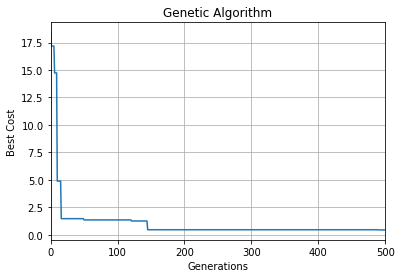

In [17]:
# Definisi Masalah
costfunc = sphere
# Jumlah Variabel Keputusan
num_var = 5       
# batas bawah
varmin = -10
# Batas Atas
varmax = 10       

# Parameter GA
# jumlah iterasi
maxit = 500
# Inisialisasi Ukuran Populasi
npop = 20 
beta = 1 # indeks untuk suatu tempat
# proporsi anak terhadap jumlah penduduk
prop_children = 4 
# pastikan selalu bilangan genap
num_children = int(np.round(prop_children * npop/2)*2)
# tingkat mutasi 40%
mu = 0.2
# ukuran langkah mutasi
sigma = 0.2  
# verbose untuk frekuensi cetak
verbose = 100

# Jalankan GA
out = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta, verbose)

# Hasil
#(output, Sol terbaik, Cost terbaik)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show